[](http://)<font color="red" size=4>What is Artificial Neural Network?</font>
<br>
Artifical Neural Networks (ANN) are one of the main tools which are used in machine learning. "Neural" part of their name is called as like that because these systems try to learn things like human brain. Replicated networks contains some kind of neurons and these neurons create a network by connecting each other. These networks have capacity of learning, storing and finding out relationships between datas like a human! <br>
For example they can learn to identify images that contain cars by analyzing example images. So after learning phase is completed if you ask to algorithm 'Is it a car?' by giving it an image, algorithm can answer your question becuase it identified other cars images and learned how a car looks like. <br>
Neural Networks has input and output layers like others but most of the cases they also have hidden layers, and usually we can say how 'deep' our algorithm according to number of hidden layers.
<br>
<br>
<br>
<img src="https://icdn5.digitaltrends.com/image/artificial_neural_network_1-791x388.jpg" width=400/>
<br>
<br>
Now we'll try to use this algorithm with a dataset contains images of 10 different classes of fashion. 
<br>
<br>
**CONTENT**
1. [Information About Data](#1)
1. [Reading Data](#2)
1. [ANN with Keras](#3)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_test.csv']


**About Dataset**<a id=1></a><br>
<br>
Dataset consists a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    - Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
    - Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
    - The training and test data sets have 785 columns. The first column consists of the class labels, and represents class of clothing. The rest of the columns contain the pixel-values of the associated image.
<br>
Each training and test example is assigned to one of the following labels:

    - 0 T-shirt/top
    - 1 Trouser
    - 2 Pullover
    - 3 Dress
    - 4 Coat
    - 5 Sandal
    - 6 Shirt
    - 7 Sneaker
    - 8 Bag
    - 9 Ankle boot 

Since we want binary classification we'll just choose 0 and 1 for our data.

**Read Data**<a id=2></a>

In [2]:
dfAll = pd.read_csv("../input/fashion-mnist_train.csv")
df = dfAll[((dfAll.label == 0) | (dfAll.label == 1))]

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,41,162,167,84,30,38,94,177,176,26,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,41,147,228,242,228,...,231,231,228,229,212,0,0,1,0,0,0,0,0,0,0,0,0,0,0,101,157,148,148,167,180,182,179,176,172,171,164,177,163,0,0,1,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,142,205,...,84,240,194,186,181,192,133,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,15,13,5,10,0,0,0,0,0,0,0,1,0,0,0
24,0,0,0,0,0,0,0,0,0,40,122,0,0,0,0,0,0,0,28,146,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,193,122,...,171,176,180,189,193,139,0,0,0,0,0,0,0,0,0,0,0,0,80,133,155,159,157,162,157,161,161,163,151,145,125,93,87,49,0,0,0,0,0,0
29,1,0,0,0,0,0,0,0,0,0,171,252,213,217,217,219,218,217,208,245,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,248,255,...,255,146,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,231,198,0,0,165,244,32,0,1,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 3 to 59996
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 72.0 MB


In [5]:
# We will split our data

from sklearn.model_selection import train_test_split

X = df.drop(["label"], axis=1)
Y = df.label
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

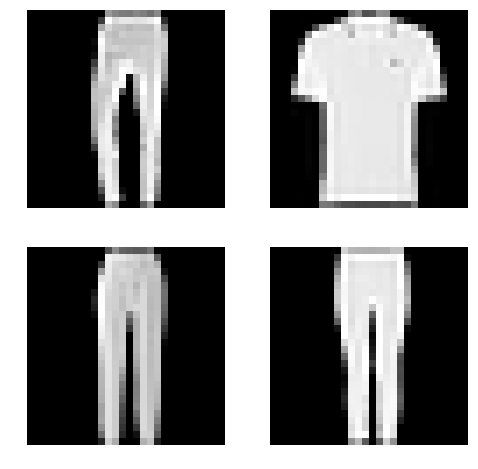

In [6]:
# Example Images

plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.imshow(x_train.head().values[i].reshape(28,28), cmap='gray', interpolation='none')

**ANN with Keras**<a id=3></a>

In [7]:
x_train = x_train.values.T
y_train = y_train.values.reshape(8400,1).T
x_test = x_test.values.T
y_test = y_test.values.reshape(3600,1).T

In [10]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def buildClassifier():
    classifier = Sequential()
    classifier.add(Dense(units=8, kernel_initializer="uniform", activation="relu", input_dim=x_train.shape[0])) # Hidden Layer 1 with 8 nodes
    classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))  # Hidden Layer 2 with 6 nodes
    classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid")) # Output Layer
    classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier


classifier = KerasClassifier(build_fn=buildClassifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train.T, y = y_train.T, cv=3)
mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy Mean is {:.2f}%".format(mean*100))
print("Accuracy Variance is {}".format(variance))

Epoch 1/100
5600/5600 [==============================] - 1s 127us/step - loss: 0.1261 - acc: 0.9571
Epoch 2/100
5600/5600 [==============================] - 0s 50us/step - loss: 0.0534 - acc: 0.9812
Epoch 3/100
5600/5600 [==============================] - 0s 48us/step - loss: 0.0462 - acc: 0.9841
Epoch 4/100
5600/5600 [==============================] - 0s 47us/step - loss: 0.0411 - acc: 0.9868
Epoch 5/100
5600/5600 [==============================] - 0s 50us/step - loss: 0.0384 - acc: 0.9863
Epoch 6/100
5600/5600 [==============================] - 0s 60us/step - loss: 0.0335 - acc: 0.9871
Epoch 7/100
5600/5600 [==============================] - 0s 61us/step - loss: 0.0314 - acc: 0.9895
Epoch 8/100
5600/5600 [==============================] - 0s 59us/step - loss: 0.0274 - acc: 0.9916
Epoch 9/100
5600/5600 [==============================] - 0s 58us/step - loss: 0.0314 - acc: 0.9896
Epoch 10/100
5600/5600 [==============================] - 0s 46us/step - loss: 0.0209 - acc: 0.9927
Epoch 11

5600/5600 [==============================] - 0s 47us/step - loss: 0.0026 - acc: 0.9995
Epoch 84/100
5600/5600 [==============================] - 0s 47us/step - loss: 0.0025 - acc: 0.9995
Epoch 85/100
5600/5600 [==============================] - 0s 47us/step - loss: 0.0156 - acc: 0.9966
Epoch 86/100
5600/5600 [==============================] - 0s 49us/step - loss: 0.0037 - acc: 0.9991
Epoch 87/100
5600/5600 [==============================] - 0s 49us/step - loss: 0.0026 - acc: 0.9995
Epoch 88/100
5600/5600 [==============================] - 0s 48us/step - loss: 0.0025 - acc: 0.9995
Epoch 89/100
5600/5600 [==============================] - 0s 48us/step - loss: 0.0024 - acc: 0.9995
Epoch 90/100
5600/5600 [==============================] - 0s 51us/step - loss: 0.0024 - acc: 0.9995
Epoch 91/100
5600/5600 [==============================] - 0s 48us/step - loss: 0.0144 - acc: 0.9973
Epoch 92/100
5600/5600 [==============================] - 0s 47us/step - loss: 0.0162 - acc: 0.9959
Epoch 93/100


5600/5600 [==============================] - 0s 47us/step - loss: 0.0026 - acc: 0.9988
Epoch 65/100
5600/5600 [==============================] - 0s 48us/step - loss: 0.0015 - acc: 0.9993
Epoch 66/100
5600/5600 [==============================] - 0s 46us/step - loss: 0.0033 - acc: 0.9982
Epoch 67/100
5600/5600 [==============================] - 0s 47us/step - loss: 0.0141 - acc: 0.9950
Epoch 68/100
5600/5600 [==============================] - 0s 44us/step - loss: 0.0034 - acc: 0.9984
Epoch 69/100
5600/5600 [==============================] - 0s 47us/step - loss: 0.0038 - acc: 0.9984
Epoch 70/100
5600/5600 [==============================] - 0s 46us/step - loss: 0.0021 - acc: 0.9989
Epoch 71/100
5600/5600 [==============================] - 0s 44us/step - loss: 0.0026 - acc: 0.9986
Epoch 72/100
5600/5600 [==============================] - 0s 44us/step - loss: 0.0015 - acc: 0.9991
Epoch 73/100
5600/5600 [==============================] - 0s 44us/step - loss: 0.0011 - acc: 0.9991
Epoch 74/100


5600/5600 [==============================] - 0s 52us/step - loss: 0.0091 - acc: 0.9962
Epoch 46/100
5600/5600 [==============================] - 0s 53us/step - loss: 0.0021 - acc: 0.9995
Epoch 47/100
5600/5600 [==============================] - 0s 55us/step - loss: 0.0031 - acc: 0.9991
Epoch 48/100
5600/5600 [==============================] - 0s 58us/step - loss: 6.8306e-04 - acc: 0.9998
Epoch 49/100
5600/5600 [==============================] - 0s 57us/step - loss: 0.0019 - acc: 0.9996
Epoch 50/100
5600/5600 [==============================] - 0s 57us/step - loss: 0.0010 - acc: 0.9998
Epoch 51/100
5600/5600 [==============================] - 0s 56us/step - loss: 0.0070 - acc: 0.9971
Epoch 52/100
5600/5600 [==============================] - 0s 55us/step - loss: 5.4300e-04 - acc: 1.0000
Epoch 53/100
5600/5600 [==============================] - 0s 56us/step - loss: 3.4355e-04 - acc: 1.0000
Epoch 54/100
5600/5600 [==============================] - 0s 55us/step - loss: 2.7773e-04 - acc: 1.00

**We can say our model works with  approximately <font color="red">99%</font> of acuracy.**

Thanks for your time!